# Food Sales Predictions: Global Explanations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import shap
from lime.lime_tabular import LimeTabularExplainer

import joblib

## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

SEED = 321
np.random.seed(SEED)

# Load Your Saved Joblib File

In [2]:
# load model from pre-saved joblib file
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

Trying to unpickle estimator SimpleImputer from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator StandardScaler from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator Pipeline from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator OneHotEncoder from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use a

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'DecisionTreeRegressor'])

In [3]:
# save parameters to variables
preprocessor = loaded_joblib['preprocessor']
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
DecisionTreeRegressor = loaded_joblib['DecisionTreeRegressor']

# Explain tree-based model with shap


In [4]:
len(X_train)

6392

In [5]:
X_shap = shap.sample(X_train,nsamples=500,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4220,0.698654,0.873252,-1.677139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2847,0.520761,0.418566,1.275305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5929,1.090017,-0.986085,0.684178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3784,-0.499157,-0.316610,1.616527,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1425,0.497042,-0.410893,-0.023898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
X_shap.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [7]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

0     515.3292
1    3056.0220
2    1577.9460
3    1331.6000
4    1687.1372
Name: Item_Outlet_Sales, dtype: float64

In [8]:
explainer = shap.Explainer(DecisionTreeRegressor)
explainer

In [9]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(500, 31)

## summary plot - bar

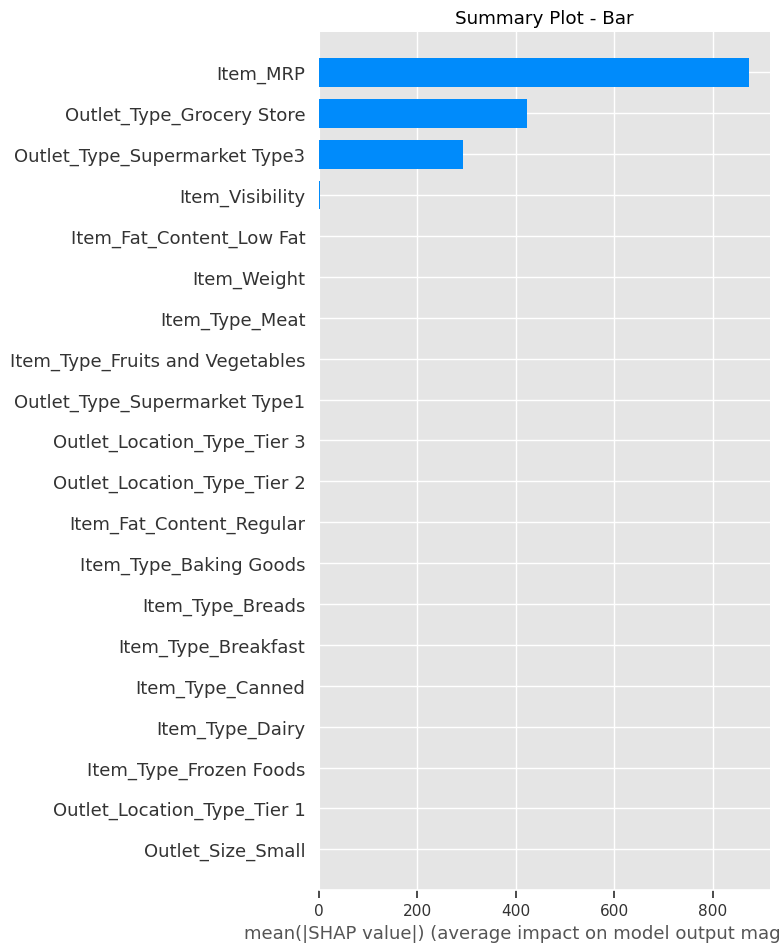

In [10]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show = False)
ax.set_title('Summary Plot - Bar');
fig.savefig('Summary_Plot_Bar.png')

### compare the most important features according to SHAP vs.original feature importances.

On my tuned_dec-tree, the following three features are the most important ones: ITEM MRP, Outlet_Type_Grocery Store and Outlet_Type_Supermarket Type3. They are the same from the summary plot above.

## summary plot - dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


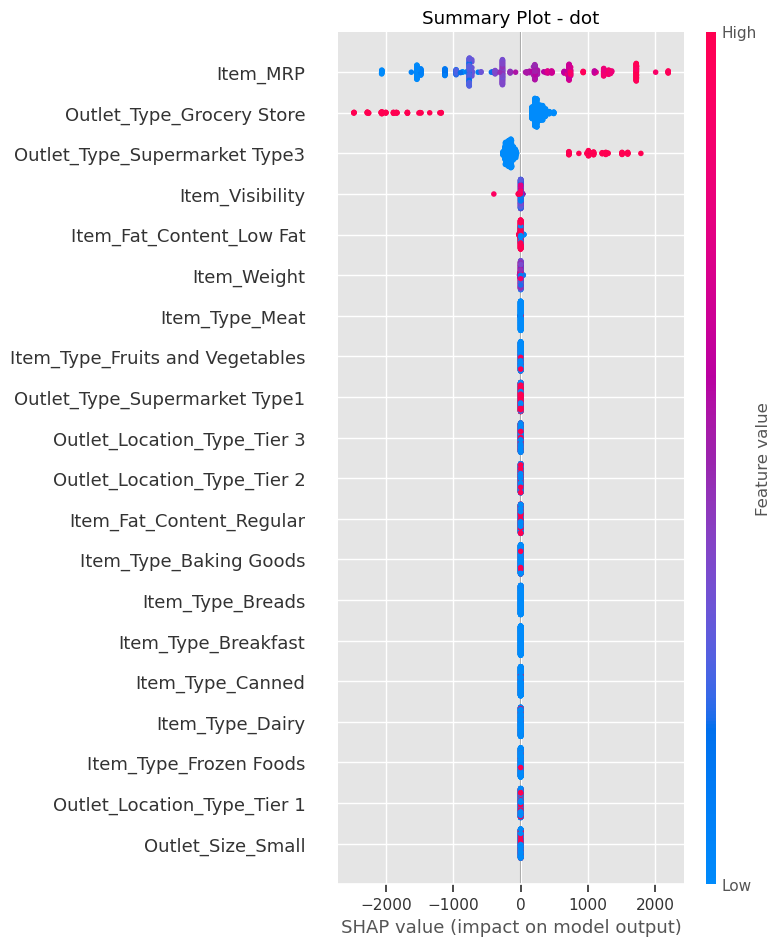

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show = False)
ax.set_title('Summary Plot - dot');
fig.savefig('Summary_Plot_dot.png')

### interpret the top 3 most important features

- Item_MRP

From the red dots on the right, we can observe that the greater the maximum retail price of an item, the higher chance the model will predict a higher item outlet sales.


- Outlet_Type_Grocery Store

From the negative values (blue dots on the right). If items are less likely to be sold in Grocery Store, it predicts a higher value in sales.

- Outlet_Type Supermarket Type3

From the red dots on the right, if items are sold in Type3 Supermarket, the models predicts it has a higher value in sales.


## Global Force Plot

In [12]:
## Global Forceplot
shap.force_plot(explainer.expected_value,shap_values.values,features=X_shap)

# Food Sales Predictions: Local Explanations

## Item_MRP

### Lime tabular explanation


### Individual Force Plot


## AAA

### Individual Force Plot

### Individual Force Plot
